<a href="https://colab.research.google.com/github/Bhavani-Rajan/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [2]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [3]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [10]:
print(income.shape, 
lifespan.shape, 
population.shape, 
entities.shape, 
concepts.shape)

(46513, 3) (44370, 3) (59297, 3) (273, 33) (590, 16)


In [11]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [12]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [13]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [14]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [15]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [16]:
print(income.shape)
print(lifespan.shape)

(46513, 3)
(44370, 3)


## various merges

In [17]:
# merged = pd.merge(income, lifespan)
merged_inner = pd.merge(income, lifespan, how='inner', on=['geo', 'time'])

merged_inner.shape

(40437, 4)

In [18]:
pd.options.display.max_rows = 500

merged_outer = pd.merge(income, lifespan, how='outer', on=['geo', 'time'])

print(merged_outer.shape)
merged_outer.head()

(50446, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603.0,28.21
1,afg,1801,603.0,28.20
2,afg,1802,603.0,28.19
3,afg,1803,603.0,28.18
4,afg,1804,603.0,28.17


In [19]:
# how to check for duplicates using a specific subset of columns
merged_outer.duplicated(subset=['geo', 'time']).value_counts()

False    50446
dtype: int64

In [20]:
# Count the number of unique values in a specific column
# if the final number does not match the num_rows of the column
# then you have duplicates
merged_outer['geo'].nunique()

216

In [21]:
merged_left = pd.merge(income, lifespan, how='left', on=['geo', 'time'])

print(merged_left.shape)
merged_left.head()

(46513, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [22]:
merged_right = pd.merge(income, lifespan, how='right', on=['geo', 'time'])

print(merged_right.shape)
merged_right.head()

(44370, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603.0,28.21
1,afg,1801,603.0,28.20
2,afg,1802,603.0,28.19
3,afg,1803,603.0,28.18
4,afg,1804,603.0,28.17


## now merge the data to explore further
by default merge is inner join

In [23]:
df = pd.merge(income, lifespan)
print(df.shape)
df.head()

(40437, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [24]:
# check for duplicates

df.duplicated(subset=['geo', 'time']).value_counts()

False    40437
dtype: int64

In [25]:
# create a new dataframe merging merged(income n lifespan) with population

df = pd.merge(df, population)
print(df.shape)
df.head()

(40437, 5)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [26]:
# now merge entities[['country', 'name', 'world_4region', 'world_6region']] to the existing df
df = pd.merge(df, 
              entities[['country', 'name', 'world_4region', 'world_6region']], 
              left_on='geo', right_on='country')
print(df.shape)
df.head()

(40437, 9)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [27]:
df = df.rename(columns = {
    'country': 'country_code',
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': '6region',
    'world_4region': '4region'
})

df.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


## Explore data

In [28]:
df.dtypes

geo              object
year              int64
income            int64
lifespan        float64
population        int64
country_code     object
country          object
4region          object
6region          object
dtype: object

In [29]:
df.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [30]:
df.describe(exclude='number')

,geo,country_code,country,4region,6region
count,40437,40437,40437,40437,40437
unique,187,187,187,4,6
top,brn,brn,Chad,africa,europe_central_asia
freq,219,219,219,11826,10778


In [31]:
usa = df[df.country == 'United States']
usa.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
38028,usa,1800,2127,39.41,6801854,usa,United States,americas,america
38029,usa,1801,2167,39.41,6933517,usa,United States,americas,america
38030,usa,1802,2202,39.41,7067728,usa,United States,americas,america
38031,usa,1803,2166,39.41,7204538,usa,United States,americas,america
38032,usa,1804,2165,39.41,7343995,usa,United States,americas,america


In [32]:
usa.describe()

,year,income,lifespan,population
count,219.000000,219.000000,219.000000,2.190000e+02
mean,1909.000000,14572.936073,54.846256,1.163662e+08
std,63.364028,15066.042247,15.202079,9.738644e+07
min,1800.000000,2113.000000,31.000000,6.801854e+06
25%,1854.500000,3512.500000,39.410000,2.752198e+07
50%,1909.000000,7989.000000,51.780000,9.236198e+07
75%,1963.500000,20090.500000,70.270000,1.962540e+08
max,2018.000000,54898.000000,79.140000,3.267667e+08


In [33]:
usa[usa.year.isin([1818,1918,2018])]

,geo,year,income,lifespan,population,country_code,country,4region,6region
38046,usa,1818,2258,39.41,9879049,usa,United States,americas,america
38146,usa,1918,9371,47.18,106721812,usa,United States,americas,america
38246,usa,2018,54898,79.14,326766748,usa,United States,americas,america


In [34]:
china = df[df.country=='China']
china[china.year.isin([1818, 1918, 2018])]

,geo,year,income,lifespan,population,country_code,country,4region,6region
6854,chn,1818,985,32.00,374161494,chn,China,asia,east_asia_pacific
6954,chn,1918,989,22.13,462444535,chn,China,asia,east_asia_pacific
7054,chn,2018,16018,76.92,1415045928,chn,China,asia,east_asia_pacific


In [35]:
india = df[df.country=='India']
india[india.year.isin([1818, 1918, 2018])]

,geo,year,income,lifespan,population,country_code,country,4region,6region
16537,ind,1818,1050,25.44,175235440,ind,India,asia,south_asia
16637,ind,1918,1157,8.12,264771644,ind,India,asia,south_asia
16737,ind,2018,6890,69.10,1354051854,ind,India,asia,south_asia


## Plot visualization

In [36]:
import seaborn as sns


now = df[df.year == 2018]
then = df[df.year == 1918]


now.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
218,afg,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia
437,ago,2018,5846,65.19,30774205,ago,Angola,africa,sub_saharan_africa
656,alb,2018,12424,78.01,2934363,alb,Albania,europe,europe_central_asia
922,are,2018,68231,76.89,9541615,are,United Arab Emirates,asia,middle_east_north_africa
1141,arg,2018,18942,76.97,44688864,arg,Argentina,americas,america


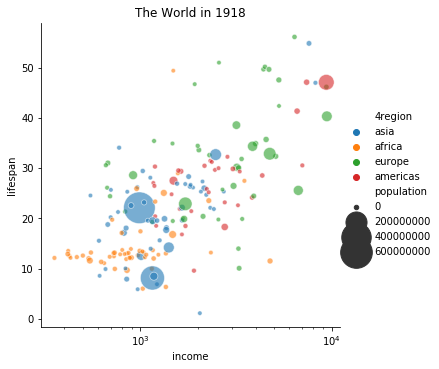

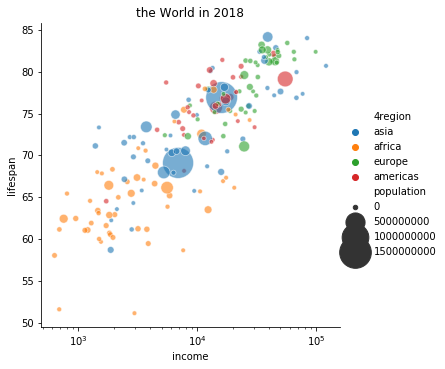

In [37]:

sns.relplot(x='income', y='lifespan', hue='4region', size='population', 
                          sizes=(20,1000),alpha = 0.6 ,data=then);
plt.xscale('log')
plt.title("The World in 1918")
# plt.ylim(0,85)
# plt.xlim(10,100000)

sns.relplot(x='income', y='lifespan', hue='4region', size='population', 
                          sizes=(20,1000),alpha = 0.6 ,data=now);
plt.xscale('log')
plt.title("the World in 2018")
# plt.ylim(0,85)
# plt.xlim(10,100000);
plt.show()

link to subplots

https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html

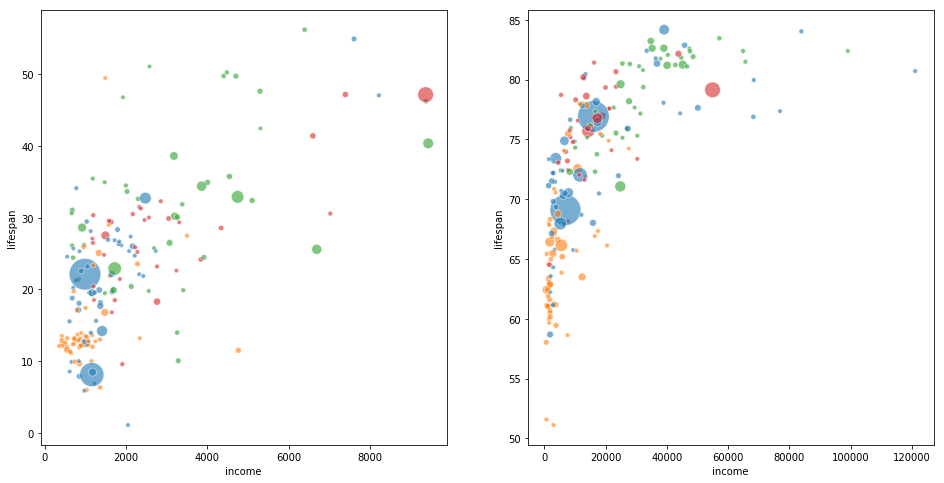

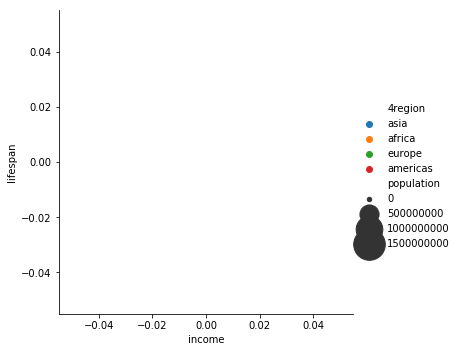

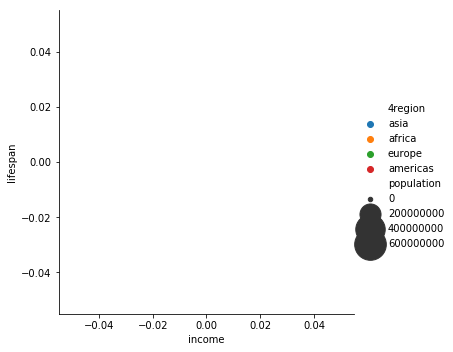

In [38]:
# We *can* still use the figure/axes syntax from matplotlib with seaborn
# but it's much more common to use it when working with multiple subplots
# if we're working with just a single graph, then we typically use 
# plt.blahblahblah (pyplot) syntax with seaborn

fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize=(16,8))
sns.relplot(x='income', y='lifespan', hue='4region', size='population', 
                          sizes=(20,1000),alpha = 0.6 ,data=now, ax=ax[1]);
sns.relplot(x='income', y='lifespan', hue='4region', size='population', 
                          sizes=(20,1000),alpha = 0.6 ,data=then, ax=ax[0]);

plt.show()

## Analyze outliers

In [39]:
now.sort_values('income', ascending=True)
# Qatar is the richest country in 2018
# Somalia is the poorest country in 2018

then.sort_values('income', ascending=False)
# Unied Kingdom was the richest country in 1918
# Malawi was the poorest country in 1918

now.sort_values('lifespan', ascending=True)
# Japan is the  most healthy country in 2018 avg lifespan is 84.17
# Lesotho is the  least healthy country in 2018 avg life span is 51.12 yrs

then.sort_values('lifespan', ascending=False)
# Denmark is the  most healthy country in 1918 avg lifespan is 56.24
# Samoa is the  least healthy country in 1918 avg life span is 1.09 yrs



,geo,year,income,lifespan,population,country_code,country,4region,6region
10067,dnk,1918,6393,56.24,3165276,dnk,Denmark,europe,europe_central_asia
1698,aus,1918,7610,54.95,5066003,aus,Australia,asia,east_asia_pacific
17513,isl,1918,2576,51.11,115504,isl,Iceland,europe,europe_central_asia
27196,nor,1918,4479,50.28,2576646,nor,Norway,europe,europe_central_asia
16856,irl,1918,4400,49.77,3034544,irl,Ireland,europe,europe_central_asia
34204,swe,1918,4702,49.76,5819451,swe,Sweden,europe,europe_central_asia
34642,syc,1918,1487,49.50,24384,syc,Seychelles,africa,sub_saharan_africa
26977,nld,1918,5295,47.65,6735715,nld,Netherlands,europe,europe_central_asia
6297,can,1918,7396,47.20,8371555,can,Canada,americas,america
38146,usa,1918,9371,47.18,106721812,usa,United States,americas,america


In [40]:
now_qatar = now[now.country=='Qatar']
now_qatar.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
30362,qat,2018,121033,80.71,2694849,qat,Qatar,asia,middle_east_north_africa


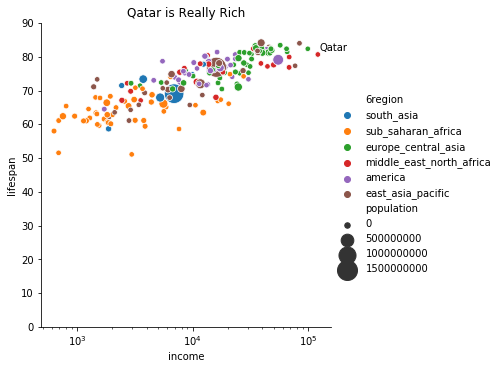

In [42]:
sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
            sizes=(30,400), data=now)
plt.xscale('log')
plt.ylim(0,90)
plt.title("Qatar is Really Rich")
plt.text(x=now_qatar.income+5000, y= now_qatar.lifespan+1, s='Qatar')
plt.show()

In [127]:
then_qatar = then[then.country=='Qatar']
then_qatar.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
30262,qat,1918,2074,25.36,18185,qat,Qatar,asia,middle_east_north_africa


In [43]:
now_japan = now[now.country=='Japan']
now_japan.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
18708,jpn,2018,39105,84.17,127185332,jpn,Japan,asia,east_asia_pacific


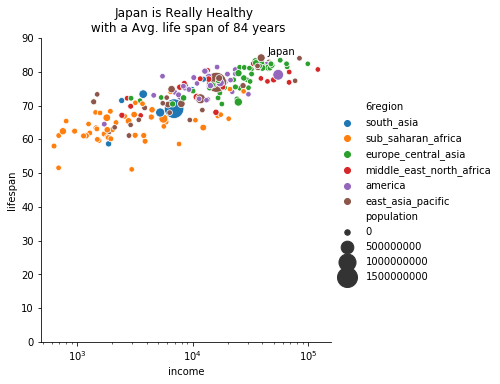

In [50]:
sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
            sizes=(30,400), data=now)
plt.xscale('log')
plt.ylim(0,90)
plt.title("Japan is Really Healthy"+" \n "+"with a Avg. life span of 84 years")

plt.text(x=now_japan.income+5000, y= now_japan.lifespan+1, s='Japan')
plt.show()

## Plot multiple years

In [51]:
years = [1818, 1918, 2018]
centuries = df[df.year.isin(years)]

centuries.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
18,afg,1818,604,28.03,3308390,afg,Afghanistan,asia,south_asia
118,afg,1918,849,7.89,5704092,afg,Afghanistan,asia,south_asia
218,afg,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia
237,ago,1818,668,26.98,1586896,ago,Angola,africa,sub_saharan_africa
337,ago,1918,1174,12.01,3487015,ago,Angola,africa,sub_saharan_africa


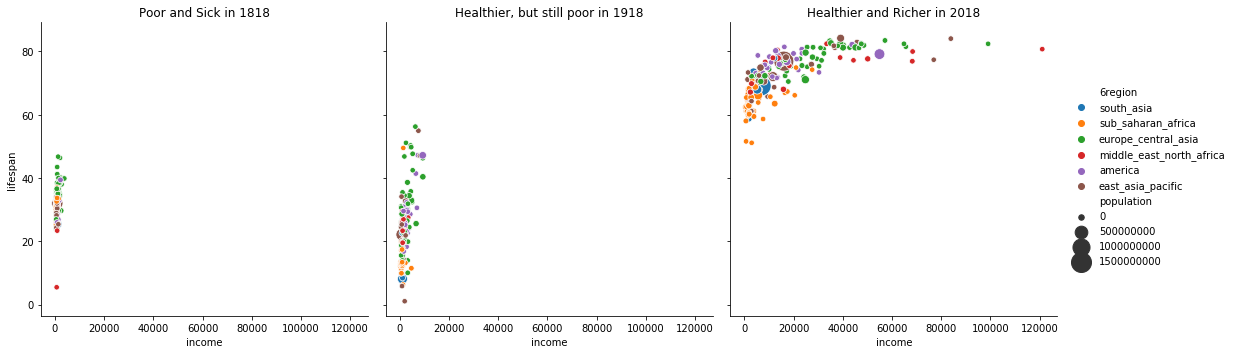

In [52]:
fig = sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
                  sizes=(30,400), col='year', data=centuries)

axes = fig.axes.flatten()
axes[0].set_title('Poor and Sick in 1818')
axes[1].set_title('Healthier, but still poor in 1918')
axes[2].set_title('Healthier and Richer in 2018');

## Point out a story

In [0]:
years = [1918, 1938, 1978, 1998, 2018]


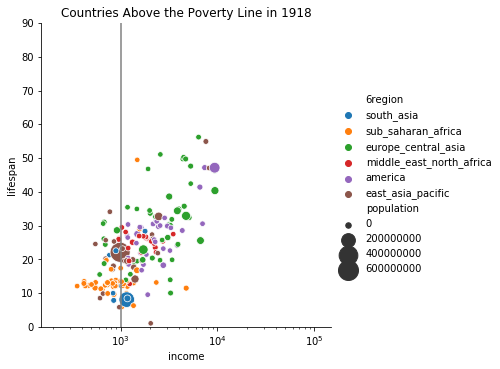

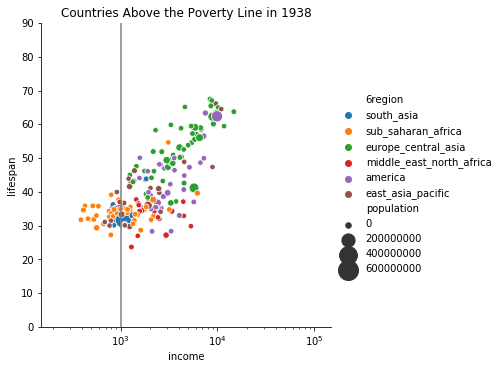

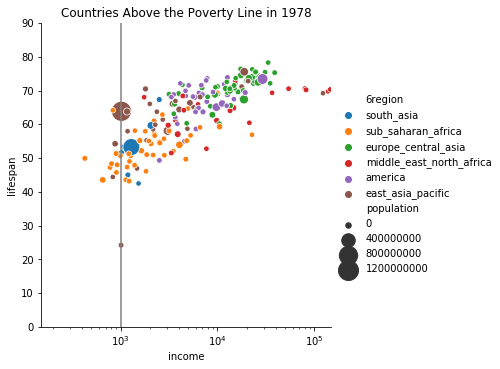

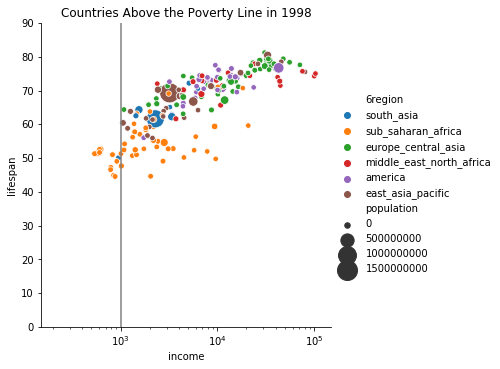

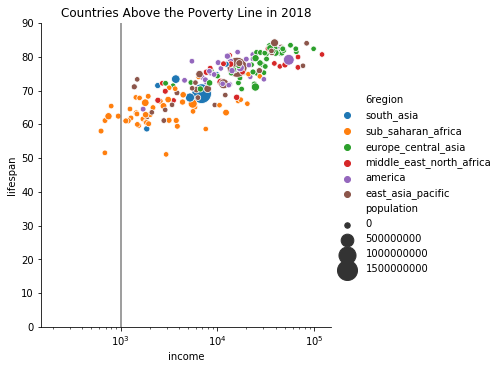

In [54]:
for year in years:
  sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
              sizes=(30,400), data=df[df.year==year])
  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((0, 90))
  plt.title('Countries Above the Poverty Line in ' + str(year))
  plt.axvline(x=1000, color='grey')

In [0]:
# story to tell about lifespan

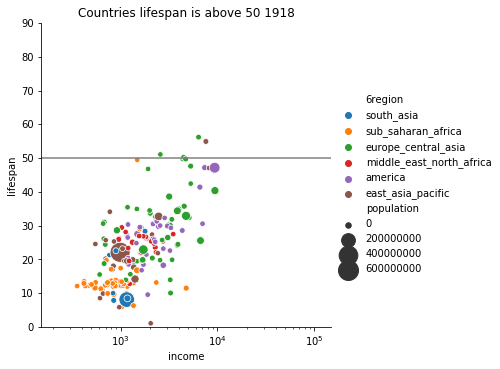

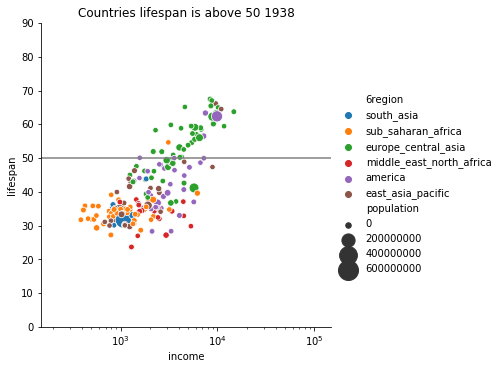

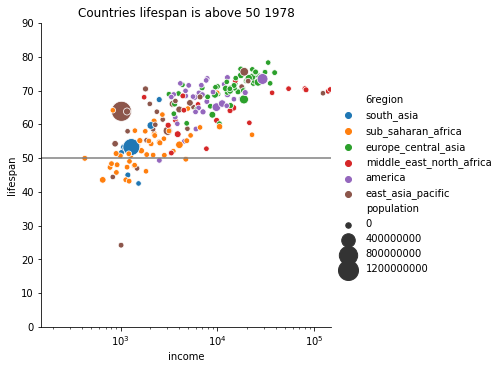

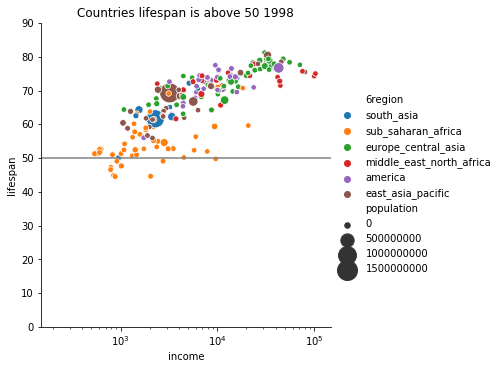

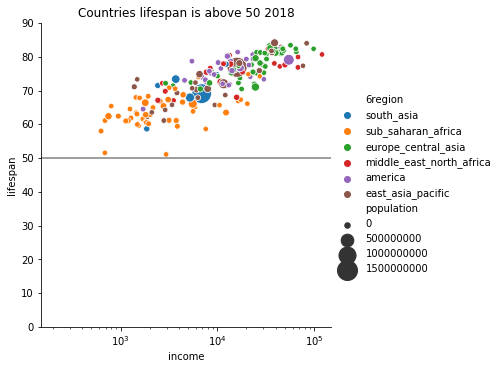

In [55]:
for year in years:
  sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
              sizes=(30,400), data=df[df.year==year])
  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((0, 90))
  plt.title('Countries lifespan is above 50 years in ' + str(year))
  plt.axhline(y=50, color='grey')